# Resampling and Interpolation example

## Only for Google Colab users:

In [ ]:
%pip install --upgrade ipympl speasy

In [ ]:
try:
    from google.colab import output

    output.enable_custom_widget_manager()
except:
    print("Not running inside Google Collab")

## For all users:

In [1]:
import speasy as spz
from speasy.signal.resampling import interpolate
import numpy as np
%matplotlib widget
mms1_products = spz.inventories.tree.cda.MMS.MMS1
# Use this instead if you are not using jupyterlab yet
#%matplotlib notebook
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.constants as cst


In [12]:
def mms1_mirror_cm(start: datetime, stop: datetime) -> spz.SpeasyVariable:
    b, Tperp, Tpara, N = spz.get_data(
        [
            mms1_products.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gsm_srvy_l2,
            mms1_products.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_tempperp_fast,
            mms1_products.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_temppara_fast,
            mms1_products.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_numberdensity_fast,
        ],
        start,
        stop
    )
    anisotropy = Tperp["eT_perp"] / Tpara["eT_para"]
    bt = b["Bt"]
    Pperp = np.multiply(N["N"], Tperp["eT_perp"])
    Pperp, anisotropy = interpolate(bt, [Pperp, anisotropy])
    betaperp = Pperp * 1e6 * cst.e * 2 * cst.mu_0 / (bt * 1e-9) ** 2
    cm = np.multiply(betaperp, anisotropy - 1.)
    cm.columns[0] = "Mirror mode instability criterion"
    return cm

<Axes: xlabel='time', ylabel='multiply_divide_multiply_mms1_dis_numberdensity_fast (cm^-3)'>

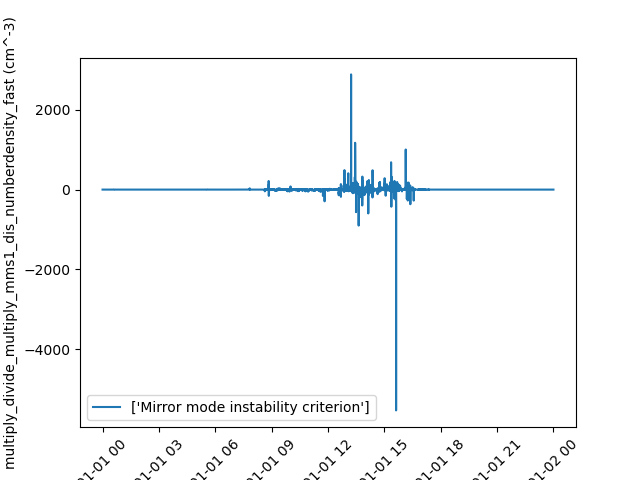

In [13]:
plt.figure()
mms1_mirror_cm(datetime(2021, 1, 1), datetime(2021, 1, 2)).plot()